In [1]:
from google.colab import files
uploaded = files.upload()   # click "Choose Files" and select salary_data_detailed.csv from your computer


Saving salary_data_detailed.csv.txt to salary_data_detailed.csv.txt


In [2]:
!ls -l /content



total 8
-rw-r--r-- 1 root root 1800 Nov 21 07:24 salary_data_detailed.csv.txt
drwxr-xr-x 1 root root 4096 Nov 17 14:29 sample_data


In [6]:
import pandas as pd

df = pd.read_csv("/content/salary_data_detailed.csv.txt")
df.head()




,years_experience,education,job_title,city,skill_score,salary
0,0.5,Bachelor,Data Analyst,Kolkata,55,180000
1,1.0,Bachelor,Data Analyst,Delhi,60,210000
2,1.2,Master,ML Engineer,Bangalore,62,260000
3,1.5,Bachelor,Software Engineer,Hyderabad,65,280000
4,2.0,Bachelor,Data Analyst,Pune,67,300000


In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   years_experience  38 non-null     float64
 1   education         38 non-null     object 
 2   job_title         38 non-null     object 
 3   city              38 non-null     object 
 4   skill_score       38 non-null     int64  
 5   salary            38 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.9+ KB


,0
years_experience,0
education,0
job_title,0
city,0
skill_score,0
salary,0


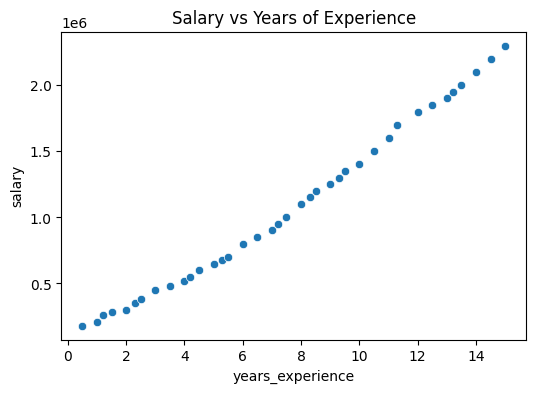

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x='years_experience', y='salary', data=df)
plt.title('Salary vs Years of Experience')
plt.show()
num_features = ['years_experience', 'skill_score']
cat_features = ['education', 'job_title', 'city']

X = df[num_features + cat_features]
y = df['salary']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)





In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# define feature lists
num_features = ['years_experience', 'skill_score']
cat_features = ['education', 'job_title', 'city']

# Use the new parameter name that works on recent sklearn
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
])


In [19]:
import sklearn
from distutils.version import LooseVersion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = ['years_experience', 'skill_score']
cat_features = ['education', 'job_title', 'city']

# Choose correct argument name depending on sklearn version
if LooseVersion(sklearn.__version__) >= LooseVersion("1.2"):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', ohe, cat_features)
])



/tmp/ipython-input-562974830.py:10: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) >= LooseVersion("1.2"):


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    'LinearRegression': Pipeline([('pre', preprocessor), ('model', LinearRegression())]),
    'RandomForest': Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
}

results = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, preds),
        'R2': r2_score(y_test, preds),
        'model': pipe
    }
    print(f"{name} => MAE: {results[name]['MAE']:.0f}, R2: {results[name]['R2']:.4f}")


LinearRegression => MAE: 23929, R2: 0.9977
RandomForest => MAE: 59738, R2: 0.9870


In [22]:
import joblib
best_name = max(results, key=lambda k: results[k]['R2'])
best_model = results[best_name]['model']
joblib.dump(best_model, "/content/best_salary_model.pkl")
print("Saved:", best_name)



Saved: LinearRegression


In [23]:
sample = pd.DataFrame([{
    'years_experience': 4.0,
    'skill_score': 78,
    'education': 'Master',
    'job_title': 'Data Scientist',
    'city': 'Bangalore'
}])
print("Predicted salary:", int(best_model.predict(sample)[0]))


Predicted salary: 557113
